###**SUPERVISED LEARNING -BOOSTING ALGORITHMS FOR 2000 SAMPLES PER CLASS.**

# Import Data for X and y

In [1]:
import pickle
import numpy as np
import pandas as pd
from time import time
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
with open('/content/df_features_train2000.pickle', 'rb') as f:
    df_train = pickle.load(f)

In [3]:
df_train.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_065-022-025,1,-304.045654,210.442856,-29.364252,-12.138075,22.309427,6.090194,4.480891,5.651807,8.733890,...,0.039815,0.026104,0.360312,0.028782,0.020647,0.095135,0.168710,0.682694,0.268308,0
bass_synthetic_123-023-127,1,-581.122681,19.400276,13.161098,12.068445,10.101112,9.067916,7.615374,6.580825,5.609818,...,0.098517,0.063681,0.055177,0.216819,0.042083,0.123787,0.144742,0.461804,0.491225,0
bass_synthetic_044-059-100,0,-504.347687,50.102257,31.777626,25.453201,22.285028,14.276178,7.285074,2.552428,-3.053812,...,0.086290,0.071110,0.059363,0.047126,0.048548,0.058193,0.049593,0.047131,0.772857,0
bass_synthetic_080-097-127,1,-601.433105,1.155329,-3.351946,3.307853,3.557914,-0.089697,-1.921454,2.518064,3.118459,...,0.238513,0.159288,0.209015,0.139147,0.163444,0.201258,0.268439,0.209768,0.241758,0
bass_synthetic_084-069-050,1,-277.723816,78.039810,-47.809990,-9.798298,-23.077721,-1.533361,-6.860663,9.153872,1.950342,...,0.045113,0.210715,0.047381,0.053805,0.041415,0.331384,0.799234,0.137420,0.029709,0


In [4]:
df_train.shape

(20000, 167)

In [5]:
with open('/content/df_features_test.pickle', 'rb') as f:
    df_test = pickle.load(f)

In [6]:
df_test.head()

,harmonic,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,...,contrast_chroma_3,contrast_chroma_4,contrast_chroma_5,contrast_chroma_6,contrast_chroma_7,contrast_chroma_8,contrast_chroma_9,contrast_chroma_10,contrast_chroma_11,targets
bass_synthetic_068-049-025,1,-522.865845,46.664154,34.379803,24.787596,17.420425,10.198804,4.609536,1.380600,-1.023340,...,0.034162,0.035634,0.025365,0.019434,0.039115,0.092514,0.086638,0.061319,0.091409,0
keyboard_electronic_001-021-127,0,-444.644012,193.890533,27.298918,-3.689526,6.295263,8.093068,10.283858,6.089181,2.495069,...,0.392218,0.563529,0.143236,0.164834,0.211634,0.353580,0.422365,0.019230,0.009007,4
guitar_acoustic_010-066-100,0,-439.373413,59.546818,2.895078,-12.039842,-12.553241,-11.451952,-12.535439,-20.456724,-19.256969,...,0.072573,0.091863,0.090990,0.840737,0.093613,0.048391,0.030883,0.015003,0.009667,3
reed_acoustic_037-068-127,1,-372.987457,68.796799,-39.474766,-22.089413,-50.149693,-16.565742,-29.849129,-16.627386,-17.712204,...,0.366166,0.036109,0.006731,0.023056,0.020713,0.885966,0.061736,0.016221,0.002263,7
flute_acoustic_002-077-100,1,-364.779663,12.566915,-42.826504,19.884624,-29.598232,-21.321131,-18.308311,-9.495085,7.672026,...,0.037789,0.052419,0.910790,0.022027,0.030132,0.009579,0.028886,0.048302,0.016970,2


In [7]:
#get training and testing data
X_train = df_train.drop(labels=['targets'], axis=1)
y_train = df_train['targets']

X_test = df_test.drop(labels=['targets'], axis=1)
y_test = df_test['targets']

In [8]:
X_test.shape

(4096, 166)

In [9]:
y_test.shape

(4096,)

# Define Confusion Matrix Function

In [10]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    #fig.tight_layout()
    return ax

In [11]:
class_names=np.array(['bass', 'brass', 'flute', 'guitar',
             'keyboard', 'mallet', 'organ', 'reed',
             'string', 'vocal'])

# Adaptive Boosting

In [12]:
# Create adaboost classifer object
ada = AdaBoostClassifier(n_estimators=256,
                         learning_rate=0.1)

In [13]:
# Train Adaboost Classifer
model = ada.fit(X_train, y_train)

In [14]:
y_pred_ada = ada.predict(X_test)
accuracy_ada = np.mean(y_pred_ada == y_test)
print("The accuracy of Adaptive Boosting is {0:.2%}".format(accuracy_ada))

The accuracy of Adaptive Boosting is 42.38%


Normalized confusion matrix
[[0.46500593 0.         0.         0.06405694 0.19098458 0.11743772
  0.01897983 0.01423488 0.         0.12930012]
 [0.02230483 0.40148699 0.12267658 0.         0.05204461 0.01858736
  0.         0.07434944 0.04089219 0.26765799]
 [0.2        0.         0.42222222 0.         0.02222222 0.19444444
  0.11111111 0.03888889 0.         0.01111111]
 [0.15030675 0.04141104 0.         0.33588957 0.20705521 0.13957055
  0.03527607 0.05368098 0.         0.03680982]
 [0.19321149 0.05091384 0.         0.2075718  0.29895561 0.15665796
  0.07049608 0.01436031 0.00522193 0.00261097]
 [0.16831683 0.         0.         0.16831683 0.11881188 0.54455446
  0.         0.         0.         0.        ]
 [0.02788845 0.0498008  0.02988048 0.         0.01792829 0.05378486
  0.58565737 0.04780876 0.02788845 0.15936255]
 [0.         0.14468085 0.06382979 0.19148936 0.         0.15744681
  0.         0.20851064 0.22978723 0.00425532]
 [0.05882353 0.0130719  0.00980392 0.06862745 0.1895

<Axes: title={'center': 'Adaptive Boosting Normalized confusion matrix - 2000 samples'}, xlabel='Predicted label', ylabel='True label'>

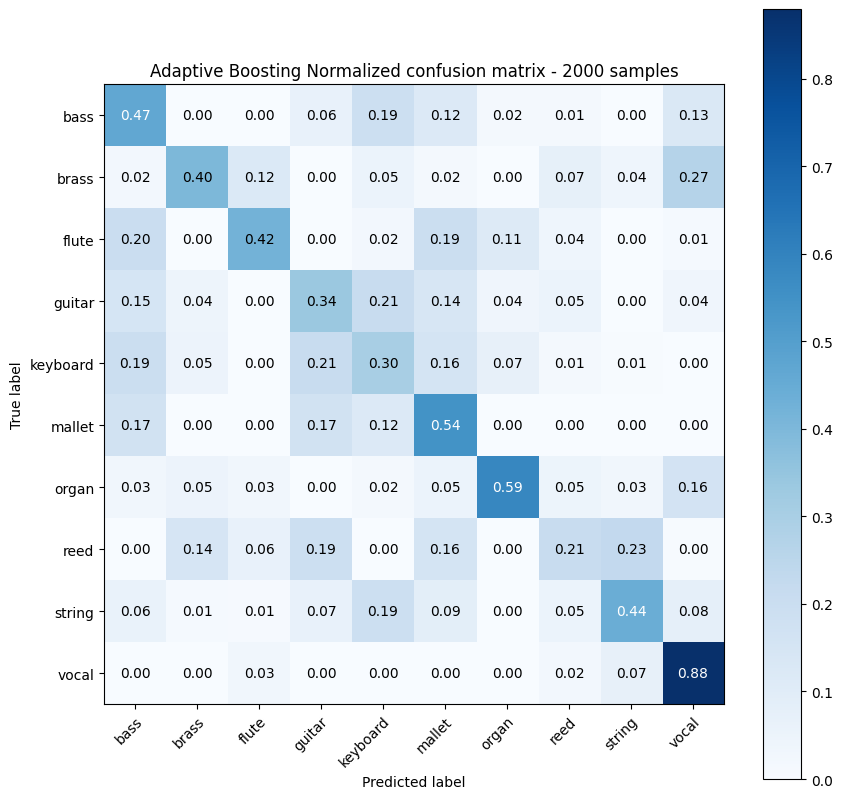

In [15]:
plot_confusion_matrix(y_test, y_pred_ada, classes=class_names, normalize=True,
                      title='Adaptive Boosting Normalized confusion matrix - 2000 samples')

# Gradient Boosting

In [16]:
gradient_booster = GradientBoostingClassifier(learning_rate=0.01)

In [17]:
gradient_booster.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)

In [18]:
y_pred_GB = gradient_booster.predict(X_test)
accuracy_GB = np.mean(y_pred_GB == y_test)
print("The accuracy of Gradient boosting is {0:.2%}".format(accuracy_GB))

The accuracy of Gradient boosting is 41.87%


Normalized confusion matrix
[[0.50771056 0.         0.01067616 0.07354686 0.15539739 0.16132859
  0.05338078 0.01779359 0.00711744 0.01304864]
 [0.00371747 0.49070632 0.07063197 0.02973978 0.08178439 0.
  0.         0.00743494 0.04460967 0.27137546]
 [0.20555556 0.01111111 0.51111111 0.         0.01111111 0.15
  0.02777778 0.01111111 0.00555556 0.06666667]
 [0.18251534 0.05828221 0.00460123 0.30981595 0.20398773 0.15030675
  0.00460123 0.01687117 0.0398773  0.0291411 ]
 [0.21018277 0.03524804 0.00522193 0.18407311 0.31853786 0.17624021
  0.02610966 0.01174935 0.         0.03263708]
 [0.16831683 0.01980198 0.         0.08415842 0.05445545 0.63861386
  0.02970297 0.0049505  0.         0.        ]
 [0.0498008  0.0498008  0.04581673 0.00398406 0.0498008  0.04183267
  0.52988048 0.02988048 0.08167331 0.11752988]
 [0.         0.18297872 0.08085106 0.16595745 0.         0.14042553
  0.         0.12765957 0.22978723 0.07234043]
 [0.09477124 0.         0.02287582 0.10784314 0.1372549  0.0882352

<Axes: title={'center': 'Gradient boosting Normalized confusion matrix - 2000 samples'}, xlabel='Predicted label', ylabel='True label'>

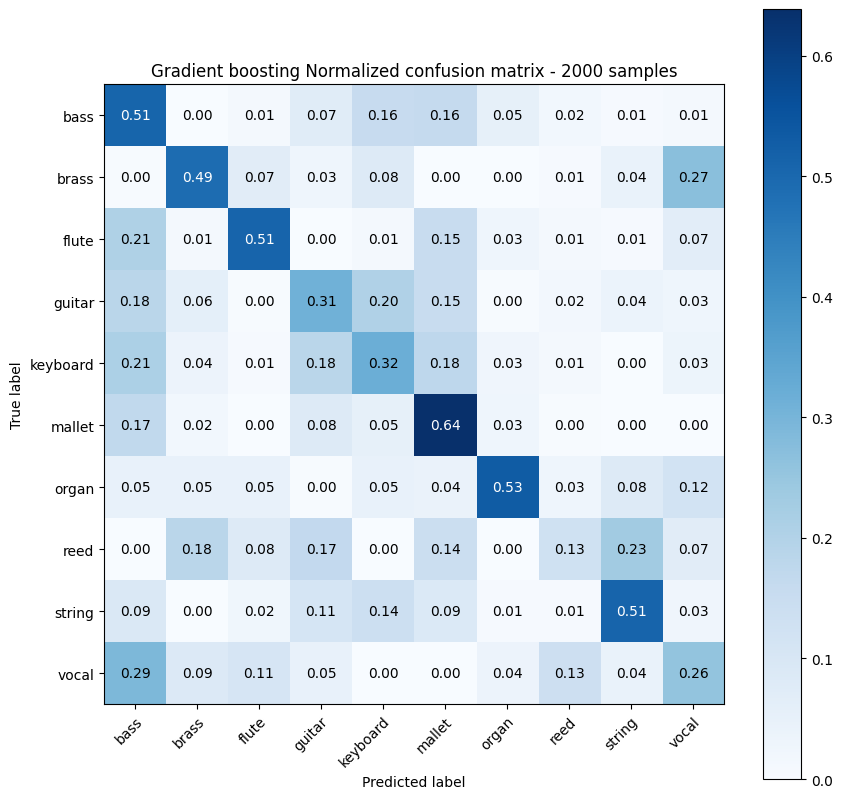

In [19]:
plot_confusion_matrix(y_test, y_pred_GB, classes=class_names, normalize=True,
                      title='Gradient boosting Normalized confusion matrix - 2000 samples')

# Extreme Gradient Boosting

In [20]:
xgb_train = xgb.DMatrix(X_train, y_train, enable_categorical=True)
xgb_test = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [21]:
# Get the number of unique classes
num_classes = len(np.unique(y_train))
print(num_classes)

10


In [22]:
n=128
params = {
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'num_class': num_classes,
    'max_depth': 8,
    'eta': 0.04,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 1,
    'gamma': 0.1,
    'learning_rate': 0.01,
    'seed': 42
}

# Train the model
XGBmodel = xgb.train(params,
                     xgb_train,
                     num_boost_round=n)

In [23]:
XGB_preds = XGBmodel.predict(xgb_test)
# Convert predicted probabilities to class labels
y_pred_XGB_classes = np.argmax(XGB_preds, axis=1)

In [24]:
# Calculate accuracy
accuracy_XGB = np.mean(y_pred_XGB_classes == y_test)
print("The accuracy of Extreme Gradient Boosting is {0:.2%}".format(accuracy_XGB))

The accuracy of Extreme Gradient Boosting is 56.79%


In [25]:
accuracy= accuracy_score(y_test,y_pred_XGB_classes)
print('Accuracy of the model is:', accuracy*100)

Accuracy of the model is: 56.787109375


Normalized confusion matrix
[[0.63107948 0.         0.00948992 0.04863582 0.10913405 0.16607355
  0.00830368 0.00830368 0.00237248 0.01660735]
 [0.02230483 0.6133829  0.04460967 0.03345725 0.00743494 0.
  0.         0.03345725 0.01115242 0.23420074]
 [0.         0.00555556 0.77222222 0.00555556 0.01111111 0.00555556
  0.04444444 0.07222222 0.         0.08333333]
 [0.13803681 0.00613497 0.00920245 0.5107362  0.23159509 0.0797546
  0.00613497 0.00460123 0.01380368 0.        ]
 [0.21409922 0.01436031 0.00522193 0.20626632 0.44778068 0.0848564
  0.01174935 0.00522193 0.00391645 0.00652742]
 [0.12376238 0.03960396 0.         0.05445545 0.18316832 0.55445545
  0.00990099 0.         0.03465347 0.        ]
 [0.07968127 0.02191235 0.03585657 0.         0.0498008  0.03386454
  0.58366534 0.09960159 0.02988048 0.06573705]
 [0.         0.36595745 0.10212766 0.05106383 0.01276596 0.
  0.         0.2893617  0.15744681 0.0212766 ]
 [0.03267974 0.00980392 0.00980392 0.03921569 0.0620915  0.04575163
  

<Axes: title={'center': 'Extreme Gradient boosting Normalized confusion matrix - 2000 samples'}, xlabel='Predicted label', ylabel='True label'>

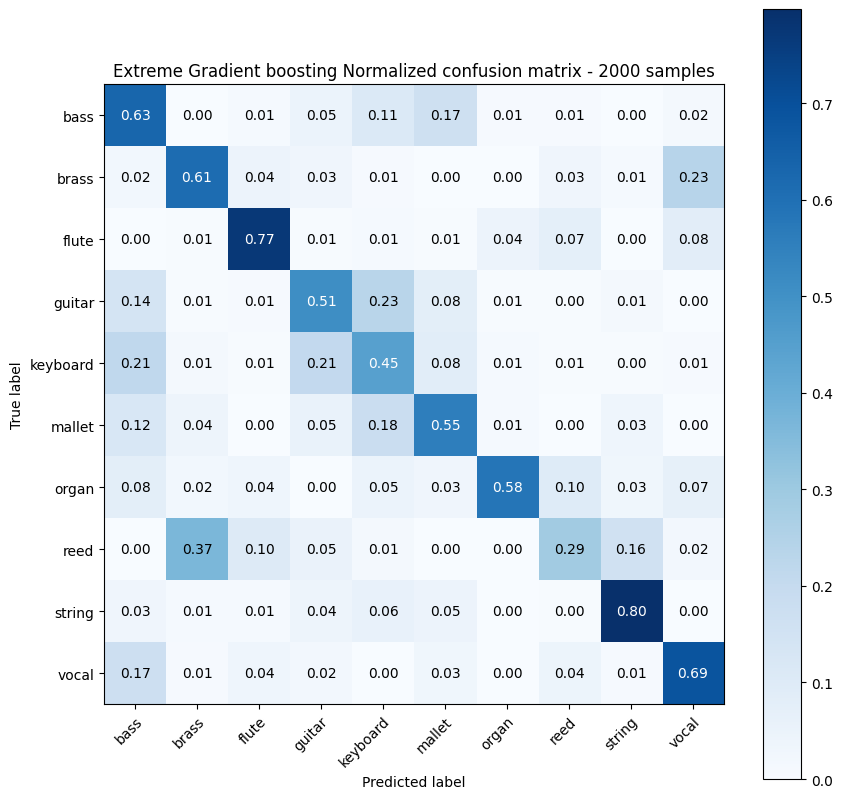

In [26]:
plot_confusion_matrix(y_test, y_pred_XGB_classes, classes=class_names, normalize=True,
                      title='Extreme Gradient boosting Normalized confusion matrix - 2000 samples')